# Neural network models

## Nececary imports

In [1]:
from ipynb.fs.full.Utils import load_dataset, scale_data, split_data
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import losses, optimizers
from keras.callbacks import EarlyStopping

/opt/anaconda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
from sklearn import preprocessing
from sklearn import datasets
from sklearn import model_selection

## Loading the data

In [4]:
x_train, x_test, y_train, y_test = load_dataset()
number_of_classes = len(y_train.unique())
print("classes: ", number_of_classes)

classes:  14


In [5]:
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

## Creating the network

In [6]:
number_of_features = x_train.shape[1]
output_size = number_of_classes

In [7]:
model = Sequential()

In [8]:
model.add(Dense(units = 60, input_dim = number_of_features, activation = 'relu'))

In [9]:
model.add(Dense(units=30, activation='relu'))

In [10]:
model.add(Dense(units = output_size, activation='softmax'))

In [11]:
model.compile(optimizer='adam', loss=losses.binary_crossentropy, metrics=['accuracy'])

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 60)                1500      
_________________________________________________________________
dense_2 (Dense)              (None, 30)                1830      
_________________________________________________________________
dense_3 (Dense)              (None, 14)                434       
Total params: 3,764
Trainable params: 3,764
Non-trainable params: 0
_________________________________________________________________


## Training the network

In [13]:
history = model.fit(x_train, y_train, epochs=30, batch_size=32, verbose=0, validation_split=0.3, \
                    callbacks=[EarlyStopping(patience=3)])

In [14]:
epochs = history.epoch

## Model characteristics

In [15]:
loss = history.history['loss']
validation_loss = history.history['val_loss']

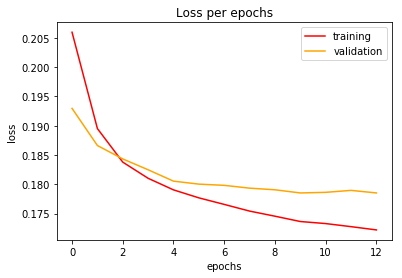

In [16]:
plt.title('Loss per epochs')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(epochs, loss, c='red', label='training')
plt.plot(epochs, validation_loss, c='orange', label='validation')
plt.legend(loc='best')
plt.show()

In [17]:
acc = history.history['acc']
validation_acc = history.history['val_acc']

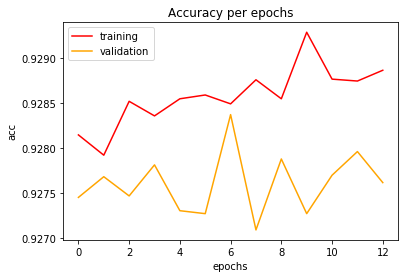

In [18]:
plt.title('Accuracy per epochs')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.plot(epochs, acc, c='red', label='training')
plt.plot(epochs, validation_acc, c='orange', label='validation')
plt.legend(loc='best')
plt.show()

## Evaluation

In [19]:
# evaluacija mreze
train_loss, train_acc = model.evaluate(x_train, y_train)
print ("Train loss: {}, train accuracy: {}".format(train_loss, train_acc))

14457/14457 [==============================] - 4s 248us/step
Train loss: 0.17286124756419163, train accuracy: 0.928877681631876


In [20]:
# evaluacija mreze
test_loss, test_acc = model.evaluate(x_test, y_test)
print ("Test loss: {}, test accuracy: {}".format(test_loss, test_acc))

6196/6196 [==============================] - 2s 248us/step
Test loss: 0.1790011612983424, test accuracy: 0.9268651860540648


In [21]:
#model.fit(x_train, y_train, epochs=7, batch_size=32)

In [22]:
print(x_test[1:2])
print(y_test[1:2])

[[ 0.04497386  0.61507717  0.24552101  0.7520818  -0.3763632  -0.75308559
  -0.58115401 -0.61542741  0.89396653  1.04905263 -0.51238876  0.21936732
  -0.33324366 -0.25872238 -0.28669109  2.76523617 -0.34037282 -0.34151037
  -0.18611349 -0.28185898 -0.29202548 -0.26370828 -0.36516984 -0.27245356]]
      chill  classical  country  hiphop  indie_alt  jazz  latin  metal  party  \
3113      1          0        0       0          0     0      0      0      0   

      pop  punk  rnb  rock  workout  
3113    0     0    0     0        0  


In [23]:
model.predict(x_test[1:2])

array([[0.265086  , 0.26175556, 0.04897328, 0.00058034, 0.15948644,
        0.00070951, 0.00513153, 0.01897362, 0.02462318, 0.00471479,
        0.08725341, 0.00481955, 0.11357732, 0.00431555]], dtype=float32)

In [24]:
# model je ispravno pogodio?

In [25]:
model.save("classifier.h5")